In [1]:
import torch
w = torch.tensor(4.0, requires_grad=True)
a = w * 3
l = a ** 2
l.backward()
print(w.grad)

tensor(72.)


In [2]:
#linear regression
x_train = torch.FloatTensor([[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])
w = torch.randn(2, 1)
b = torch.randn(1)
print(w, b)

lr = 0.01
for epoch in range(3001):
    w.requires_grad_(True)
    b.requires_grad_(True)
    
    h = x_train @ w + b
    cost = ((h - y_train) ** 2).mean()
    
    cost.backward()
    
    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad
        
        if epoch % 100 == 0:
            print(epoch, cost.item(), w.squeeze(), b)

tensor([[-0.4088],
        [ 0.6673]]) tensor([0.3574])
0 87.33390808105469 tensor([-0.0834,  1.2884]) tensor([0.4690])
100 1.9493783712387085 tensor([0.3724, 3.2251]) tensor([-1.0386])
200 0.9835619926452637 tensor([0.7565, 3.2172]) tensor([-1.9300])
300 0.5052369832992554 tensor([1.0999, 3.1620]) tensor([-2.5221])
400 0.2596477270126343 tensor([1.3537, 3.1169]) tensor([-2.9412])
500 0.13343767821788788 tensor([1.5366, 3.0839]) tensor([-3.2410])
600 0.0685761421918869 tensor([1.6678, 3.0601]) tensor([-3.4559])
700 0.035242579877376556 tensor([1.7618, 3.0431]) tensor([-3.6100])
800 0.018111784011125565 tensor([1.8293, 3.0309]) tensor([-3.7204])
900 0.00930803082883358 tensor([1.8776, 3.0222]) tensor([-3.7996])
1000 0.004783623851835728 tensor([1.9123, 3.0159]) tensor([-3.8563])
1100 0.002458409871906042 tensor([1.9371, 3.0114]) tensor([-3.8970])
1200 0.0012633815640583634 tensor([1.9549, 3.0082]) tensor([-3.9262])
1300 0.0006492786342278123 tensor([1.9677, 3.0059]) tensor([-3.9471])
14

In [3]:
import torch  
x_train=torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train=torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [4]:
#linear_regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = [[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]]
y = [[4], [8], [23], [1], [-2]]

lr.fit(x, y)
#실제로 scikit-learn에서 구하는 coef(w)와 intercept(b)는 경사하강법이 아니다. 
print(lr.coef_, lr.intercept_)

x_test = [[5, 10], [2, 7], [10, 3]]
y_test = lr.predict(x_test)
print(y_test)

[[2. 3.]] [-4.]
[[36.]
 [21.]
 [25.]]


In [5]:
#bce를 통한 분류

bce = torch.nn.BCELoss()

import math
w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(3001):
    w.requires_grad_(True)
    b.requires_grad_(True)
    
    h = torch.sigmoid(x_train @ w + b)
    # h = 1 / (1 + math.e ** (-(x_train @ w + b)))
    
    # cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))
    cost = bce(h, y_train)
    cost.backward()
    
    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(epoch, cost.item(), w.item(), b.item())
            

0 1.2426789999008179 -0.2901606559753418 1.406509518623352
100 0.4157479703426361 -1.5245215892791748 4.632030963897705
200 0.3973163664340973 -1.9400299787521362 5.900088310241699
300 0.3901863098144531 -2.2024333477020264 6.694453716278076
400 0.3866744339466095 -2.387808322906494 7.253246784210205
500 0.3847322165966034 -2.5261824131011963 7.669256687164307
600 0.3835822641849518 -2.632913589477539 7.989555835723877
700 0.38287022709846497 -2.7170357704162598 8.241677284240723
800 0.38241544365882874 -2.784351110458374 8.443233489990234
900 0.3821180760860443 -2.8388216495513916 8.606206893920898
1000 0.3819204568862915 -2.883270502090454 8.739119529724121
1100 0.3817872107028961 -2.919776201248169 8.84822940826416
1200 0.38169658184051514 -2.94991397857666 8.938273429870605
1300 0.381634384393692 -2.9748964309692383 9.01289176940918
1400 0.3815912902355194 -2.9956700801849365 9.074923515319824
1500 0.38156139850616455 -3.0129921436309814 9.126638412475586
1600 0.3815406262874603 -3

In [6]:
x_test = torch.FloatTensor([[4.5], [1.1]])    
test_result = torch.sigmoid(x_test @ w + b)

# print(test_result)
print(torch.round(test_result))


tensor([[0.],
        [1.]])


In [7]:
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

# optimizer = torch.optim.Adam([w, b], lr=1.0)
# optimizer = torch.optim.SGD([w, b], lr=1.0)
optimizer = torch.optim.RMSprop([w, b], lr=0.1)


for epoch in range(3001):
    
    h = torch.sigmoid(x_train @ w + b)
    cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))
    
    #누적된 기울기 초기화
    optimizer.zero_grad()
    #기울기, 편향 계산
    cost.backward()
    
    #가중치 업데이트
    optimizer.step()
    
    with torch.no_grad():

        if epoch % 100 == 0:
            print(epoch, cost.item(), w.item(), b.item())

0 1.0753892660140991 -0.35750263929367065 -1.4853863716125488
100 0.4057193696498871 -1.7229758501052856 5.248586177825928
200 0.39578214287757874 -2.321934461593628 7.329427719116211
300 0.3829352855682373 -2.7079761028289795 8.239358901977539
400 0.38259825110435486 -2.8705146312713623 8.803410530090332
500 0.3828332722187042 -2.960695266723633 9.111281394958496
600 0.3837950527667999 -3.0035133361816406 9.292625427246094
700 0.3843172788619995 -3.031177520751953 9.393213272094727
800 0.38399538397789 -3.0527501106262207 9.4443359375
900 0.3839006721973419 -3.0637941360473633 9.474421501159668
1000 0.3839716613292694 -3.0689494609832764 9.492876052856445
1100 0.383990615606308 -3.0722286701202393 9.503206253051758
1200 0.38397467136383057 -3.0743515491485596 9.50886344909668
1300 0.3839724361896515 -3.0754806995391846 9.512185096740723
1400 0.38397645950317383 -3.076082706451416 9.514141082763672
1500 0.3839770555496216 -3.0764498710632324 9.515246391296387
1600 0.38397613167762756 -

In [24]:
#softmax
import torch
import torch.nn.functional as F
import torch.nn as nn

x_train = torch.tensor([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ], dtype=torch.float)
y_train = torch.tensor([ 2, 2, 2, 1, 1, 1, 0, 0], dtype=torch.long)

# W = torch.randn(4, 3, requires_grad=True)
# b = torch.randn(1, 3, requires_grad=True)

# optim = torch.optim.Adam([W, b], lr=0.1)
model = nn.Linear(4, 3)
optim = torch.optim.Adam(model.parameters(), lr=0.1)
for epoch in range(3001):
    
    # h = torch.mm(x_train, W) + b
    h = model(x_train)
    #cost 계산
    
    cost = F.cross_entropy(h, y_train)
    
    optim.zero_grad()
    cost.backward()
    optim.step()
    
    with torch.no_grad():
        if epoch % 100 == 0:
            print(f"epoch:{epoch}, cost:{cost.item()}") 

epoch:0, cost:2.2546908855438232
epoch:100, cost:0.31657472252845764
epoch:200, cost:0.2015831470489502
epoch:300, cost:0.13777488470077515
epoch:400, cost:0.1002374067902565
epoch:500, cost:0.07629694044589996
epoch:600, cost:0.060033608227968216
epoch:700, cost:0.04845796525478363
epoch:800, cost:0.03991863131523132
epoch:900, cost:0.033436369150877
epoch:1000, cost:0.0283978171646595
epoch:1100, cost:0.02440267987549305
epoch:1200, cost:0.021180428564548492
epoch:1300, cost:0.018542766571044922
epoch:1400, cost:0.016355669125914574
epoch:1500, cost:0.014521420933306217
epoch:1600, cost:0.012967719696462154
epoch:1700, cost:0.01163968164473772
epoch:1800, cost:0.010495397262275219
epoch:1900, cost:0.009502395987510681
epoch:2000, cost:0.008635029196739197
epoch:2100, cost:0.007872886955738068
epoch:2200, cost:0.007199637126177549
epoch:2300, cost:0.0066019101068377495
epoch:2400, cost:0.0060689738020300865
epoch:2500, cost:0.0055917659774422646
epoch:2600, cost:0.005162868648767471
e

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ])
y_train = np.array([ 2, 2, 2, 1, 1, 1, 0, 0])

#y 에 0, 1, 2 등 둘 이상의 class가 존재 => softmax regression
model = LogisticRegression(penalty=None)

model.fit(x_train, y_train)

x_test = np.array([[1, 11, 10, 9], [1, 3, 4, 3], [1, 1, 0, 1]])
model.predict(x_test)



array([0, 1, 2])

In [20]:
#softmax
x_train = torch.tensor([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ], dtype=torch.float)
y_train = torch.tensor([[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], 
                       [0,1,0], [1,0,0], [1,0,0]], dtype=torch.float)

W = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)

optim = torch.optim.Adam([W, b], lr=0.1)

for epoch in range(3001):
    #어디를 합을 1로 만들건지(dim=0 or 1)
    h = torch.softmax(torch.mm(x_train, W) + b, dim=1)   
    #cost 계산
    cost = -torch.mean(torch.sum(y_train * torch.log(h), dim=1))
    
    optim.zero_grad()
    cost.backward()
    optim.step()
    
    with torch.no_grad():
        if epoch % 100 == 0:
            print(f"epoch:{epoch}, cost:{cost.item()}") 

epoch:0, cost:8.982460021972656
epoch:100, cost:0.3560991585254669
epoch:200, cost:0.23404189944267273
epoch:300, cost:0.1653594672679901
epoch:400, cost:0.12284959107637405
epoch:500, cost:0.0947890430688858
epoch:600, cost:0.07527570426464081
epoch:700, cost:0.06115284189581871
epoch:800, cost:0.05060599371790886
epoch:900, cost:0.042526327073574066
epoch:1000, cost:0.03620282933115959
epoch:1100, cost:0.031162874773144722
epoch:1200, cost:0.027081714943051338
epoch:1300, cost:0.023730918765068054
epoch:1400, cost:0.020946018397808075
epoch:1500, cost:0.018606187775731087
epoch:1600, cost:0.016621368005871773
epoch:1700, cost:0.014922989532351494
epoch:1800, cost:0.013458430767059326
epoch:1900, cost:0.012186627835035324
epoch:2000, cost:0.011075077578425407
epoch:2100, cost:0.010098040103912354
epoch:2200, cost:0.009234645403921604
epoch:2300, cost:0.008468003012239933
epoch:2400, cost:0.007784293964505196
epoch:2500, cost:0.007171948440372944
epoch:2600, cost:0.0066215889528393745


In [ ]:
x_test = torch.tensor([[1, 11, 10, 9], [1, 3, 4, 3], [1, 1, 0, 1]], dtype=torch.float)

h = torch.softmax(torch.mm(x_test, W) + b, dim = 1)    

In [14]:
import torch
import torch.nn.functional as F

# 입력 데이터 준비 (logits)
logits = torch.tensor([[2.0, 1.0, 0.1],
                       [1.0, 3.0, 0.2],
                       [0.5, 1.5, 2.0]])

# 소프트맥스 적용
softmax_probs = F.softmax(logits, dim=1)

print("소프트맥스 확률 출력:")
print(softmax_probs)


소프트맥스 확률 출력:
tensor([[0.6590, 0.2424, 0.0986],
        [0.1131, 0.8360, 0.0508],
        [0.1220, 0.3315, 0.5465]])


In [26]:
#softmax
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([ [1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
                            [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7] ])
y_train = np.array([ 2, 2, 2, 1, 1, 1, 0, 0])

model = LogisticRegression(penalty=None)

model.fit(x_train, y_train)

x_test = np.array([[1, 11, 10, 9], [1, 3, 4, 3], [1, 1, 0, 1]])
model.predict(x_test)

array([0, 1, 2])

In [15]:
#cross entropy
import torch
import torch.nn as nn

# 다중 클래스 예제 (CrossEntropyLoss)
y_true = torch.tensor([2, 0])  # 실제 값 (원-핫 인코딩이 아님, 클래스 인덱스로 전달)
y_pred = torch.tensor([[0.1, 0.3, 0.6], [0.7, 0.2, 0.1]])  # 예측 값 (로짓 값)

criterion = nn.CrossEntropyLoss()
loss = criterion(y_pred, y_true)
print(f"Cross Entropy 손실: {loss.item()}")

# 이진 분류 예제 (BCELoss)
y_true_binary = torch.tensor([1.0, 0.0, 1.0])  # 실제 값
y_pred_binary = torch.tensor([0.9, 0.1, 0.8])  # 예측 값

bce_criterion = nn.BCELoss()
bce_loss = bce_criterion(y_pred_binary, y_true_binary)
print(f"Binary Cross Entropy 손실: {bce_loss.item()}")


Cross Entropy 손실: 0.8106180429458618
Binary Cross Entropy 손실: 0.14462153613567352


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터셋 준비
x_train = torch.tensor([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [0.0, 0.0]])
y_train = torch.tensor([0, 1, 2, 3])  # 클래스 레이블 (0, 1, 2, 3)

# 모델 정의
class SoftmaxClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxClassifier, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # 입력과 출력 연결

    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifier(input_dim=2, output_dim=4)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 내부적으로 Softmax 포함
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam Optimizer 사용

# 학습 반복 (Epoch Loop)
epochs = 500
for epoch in range(epochs):
    # Forward Propagation
    output = model(x_train)

    # 손실 계산
    loss = criterion(output, y_train)

    # Gradient 초기화, Backpropagation, 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 중간 결과 출력
    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# 테스트
test_input = torch.tensor([[1.0, 0.0]])  # 새로운 데이터 예측
test_output = model(test_input)
predicted_class = torch.argmax(test_output, dim=1)
print(f"Predicted class for {test_input}: {predicted_class.item()}")


Epoch [0/500], Loss: 1.6165
Epoch [50/500], Loss: 1.0411
Epoch [100/500], Loss: 0.7446
Epoch [150/500], Loss: 0.5553
Epoch [200/500], Loss: 0.4265
Epoch [250/500], Loss: 0.3365
Epoch [300/500], Loss: 0.2717
Epoch [350/500], Loss: 0.2240
Epoch [400/500], Loss: 0.1878
Epoch [450/500], Loss: 0.1599
Predicted class for tensor([[1., 0.]]): 0


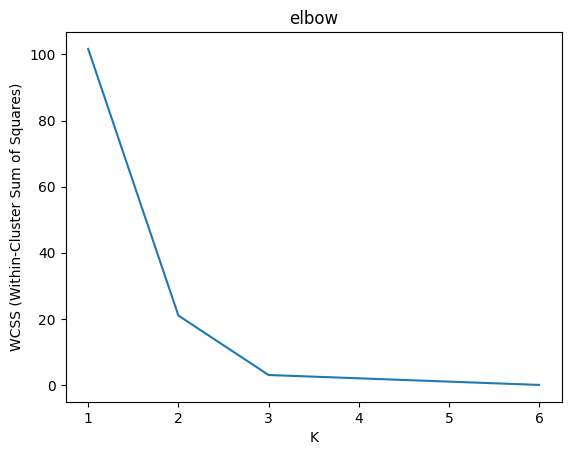

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# 데이터 포인트 정의
data = np.array([[1, 2], [2, 1], [4, 5], [5, 4], [8, 8], [9, 9]])

# WCSS 저장 리스트
wcss = []

# 다양한 K 값에 대해 K-Means 수행 (데이터 포인트 개수를 초과하지 않도록 설정)
for k in range(1, len(data) + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# 엘보우 방법을 위한 그래프 그리기
plt.plot(range(1, len(data) + 1), wcss)
plt.title('elbow')
plt.xlabel('K')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [11]:
import numpy as np

X = []
Y = []
for line in open("iris.data", "r"):
    line = line.rstrip()
    if line == "": continue

    *x, y = line.split(",")
    x = [float(i) for i in x]
    X.append(x)
    Y.append(y)
    

labels = list(set(Y))
Y = [labels.index(y) for y in Y]

X = np.array(X)
Y = np.array(Y)

In [12]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, queries):
        Y = []
        for q in queries:
            dists = np.linalg.norm(self.X - q, axis = 1)
            knns= np.argsort(dists)[:self.k]
            counts = np.bincount(self.Y[knns])
            Y.append(np.argmax(counts))

        return np.array(Y)

In [13]:
perm = np.random.permutation(len(X))
n_trains = int(len(X) * 0.8)
X_train = X[perm[:n_trains]]
Y_train = Y[perm[:n_trains]]
X_test = X[perm[n_trains:]]
Y_test = Y[perm[n_trains:]]

knn = KNNClassifier(5)
knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print("Train accuracy:", (pred_train == Y_train).mean())
print("Test accuracy:", (pred_test == Y_test).mean())

Train accuracy: 0.9583333333333334
Test accuracy: 1.0
